# Predicting Employee Turnover with Machine Learning

An end-to-end machine learning pipeline including EDA, data processing, feature engineering, model training, cross validation, and model evaluation.

Author: Anselm Long

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("davinwijaya/employee-turnover")

print("Path to dataset files:", path)


/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/anselmlong/.cache/kagglehub/datasets/davinwijaya/employee-turnover/versions/1


Moved dataset to df/turnover.csv


In [5]:
df = pd.read_csv(f"data/turnover.csv", on_bad_lines='skip', encoding="latin1")
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
        stag  event gender   age         industry  profession      traffic  \
0   7.030801      1      m  35.0            Banks          HR  rabrecNErab   
1  22.965092      1      m  33.0            Banks          HR        empjs   
2  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
3  15.934292      1      f  35.0  PowerGeneration          HR  rabrecNErab   
4   8.410678      1      m  32.0           Retail  Commercial        youjs   

  coach head_gender greywage  way  extraversion  independ  selfcontrol  \
0    no           f    white  bus           6.2       4.1          5.7   
1    no           m    white  bus           6.2       4.1          5.7   
2    no           m    white  bus           6.2       6.2          2.6   
3    no           m    white  bus           5.4       7.6          4.9   
4   yes           f    white  bus           3.0       4.1          8.0   

   anxiety  novator  
0      7.1      8.3  
1      7.1   

## Exploratory Data Analysis

We have 16 columns, inclusive of 1 target column named `event`. The other columns are listed as follows:

### stag
Experience (time)


### event
Employee turnover


### gender
Employee's gender, female(f), or male(m)


### age
Employee's age (year)


### industry
Employee's Industry


### profession
Employee's profession


### traffic
From what pipelene employee came to the company. You contacted the company directly (after learning from advertising, knowing the company's brand, etc.) - advert You contacted the company directly on the recommendation of your friend - NOT an employee of this company-recNErab You contacted the company directly on the recommendation of your friend - an employee of this company - referal You have applied for a vacancy on the job site - youjs The recruiting agency brought you to the employer - KA Invited by the Employer, we knew him before the employment - friends The employer contacted you on the recommendation of a person who knows you - rabrecNErab The employer reached you through your resume on the job site - empjs


### coach
Presence of a coach (training) on probation


### head_gender
head (supervisor) gender


### greywage
The salary does not seem to the tax authorities. Greywage in Russia or Ukraine means that the employer (company) pay just a tiny bit amount of salary above the white-wage (white-wage means minimum wage)


### way
Employee's way of transportation


### extraversion
Extraversion score


### independ
Independend score


### selfcontrol
Selfcontrol score


### anxiety
Anxiety score


### novator
Novator score (desire for novelty/independence)

In [6]:
print (df.describe())
print (df.columns.to_list())
print (df.info())
print (df.isnull().sum())
print (len(df.columns))
print (f"Shape of dataset: {df.shape}")

              stag        event          age  extraversion     independ  \
count  1129.000000  1129.000000  1129.000000   1129.000000  1129.000000   
mean     36.627526     0.505757    31.066965      5.592383     5.478034   
std      34.096597     0.500188     6.996147      1.851637     1.703312   
min       0.394251     0.000000    18.000000      1.000000     1.000000   
25%      11.728953     0.000000    26.000000      4.600000     4.100000   
50%      24.344969     1.000000    30.000000      5.400000     5.500000   
75%      51.318275     1.000000    36.000000      7.000000     6.900000   
max     179.449692     1.000000    58.000000     10.000000    10.000000   

       selfcontrol      anxiety      novator  
count  1129.000000  1129.000000  1129.000000  
mean      5.597254     5.665633     5.879628  
std       1.980101     1.709176     1.904016  
min       1.000000     1.700000     1.000000  
25%       4.100000     4.800000     4.400000  
50%       5.700000     5.600000     6.0000

In [7]:
categorical = []
numerical = []
for column in df.columns:
	if df[column].dtype == 'object':
		print(f"Unique values in column '{column}': {df[column].unique()}")
		print (f"Number of unique values in column '{column}': {df[column].nunique()}")
		categorical.append(column)
	if df[column].dtype in ['int64', 'float64']:
		print(f"Statistical summary for column '{column}':")
		print(df[column].describe())
		numerical.append(column)

print ("Number of Categorical columns:", len(categorical))
print ("Categorical columns:", categorical)
print ("Number of Numerical columns:", len(numerical))
print ("Numerical columns:", numerical)

Statistical summary for column 'stag':
count    1129.000000
mean       36.627526
std        34.096597
min         0.394251
25%        11.728953
50%        24.344969
75%        51.318275
max       179.449692
Name: stag, dtype: float64
Statistical summary for column 'event':
count    1129.000000
mean        0.505757
std         0.500188
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: event, dtype: float64
Unique values in column 'gender': ['m' 'f']
Number of unique values in column 'gender': 2
Statistical summary for column 'age':
count    1129.000000
mean       31.066965
std         6.996147
min        18.000000
25%        26.000000
50%        30.000000
75%        36.000000
max        58.000000
Name: age, dtype: float64
Unique values in column 'industry': ['Banks' 'PowerGeneration' 'Retail' 'manufacture' 'Consult' 'State' 'etc'
 'Building' 'IT' ' HoReCa' 'Telecom' 'Pharma' 'Mining' 'transport'
 'Agriculture' 'RealEstate']
Nu

In [8]:
df.isnull().sum()

# Great, no missing values

stag            0
event           0
gender          0
age             0
industry        0
profession      0
traffic         0
coach           0
head_gender     0
greywage        0
way             0
extraversion    0
independ        0
selfcontrol     0
anxiety         0
novator         0
dtype: int64

## Univariate Analysis - Histograms 

Process categorical and numerical data differently. For categorical, we display a bar chart based on value counts, while for numerical, we plot a histogram.



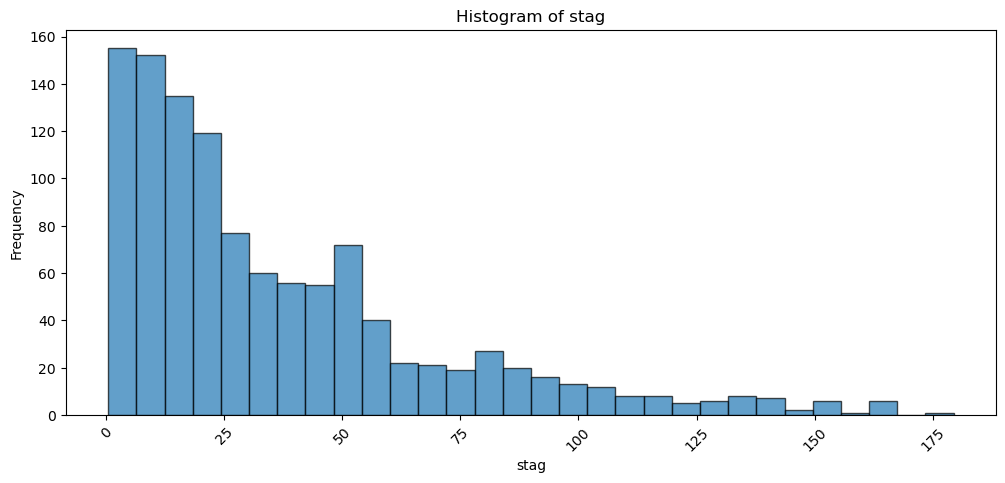

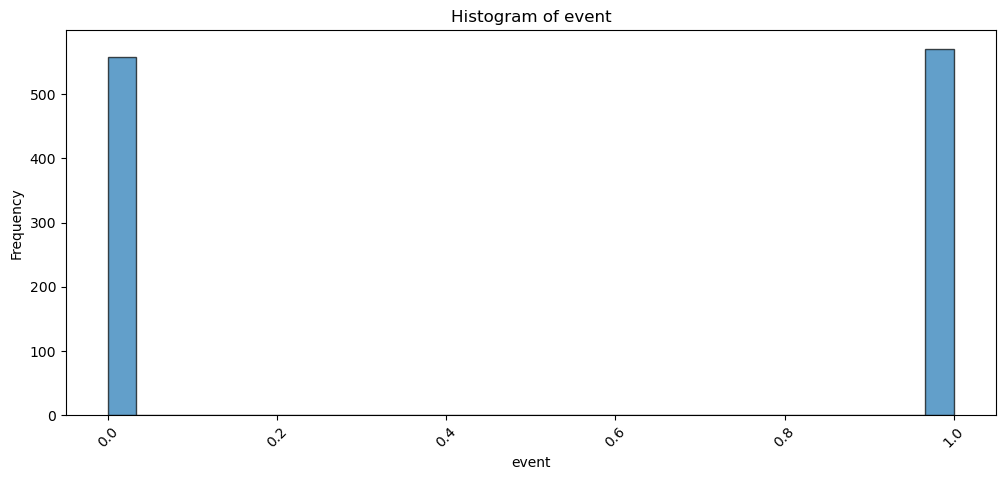

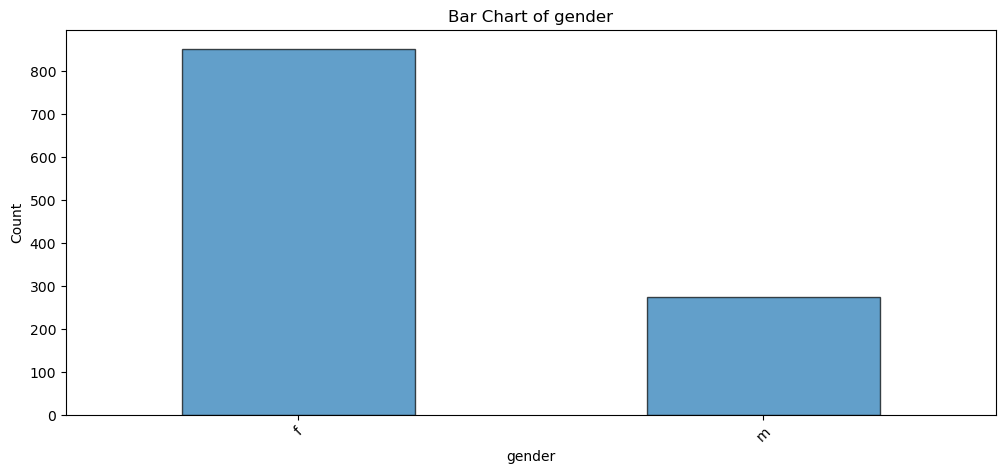

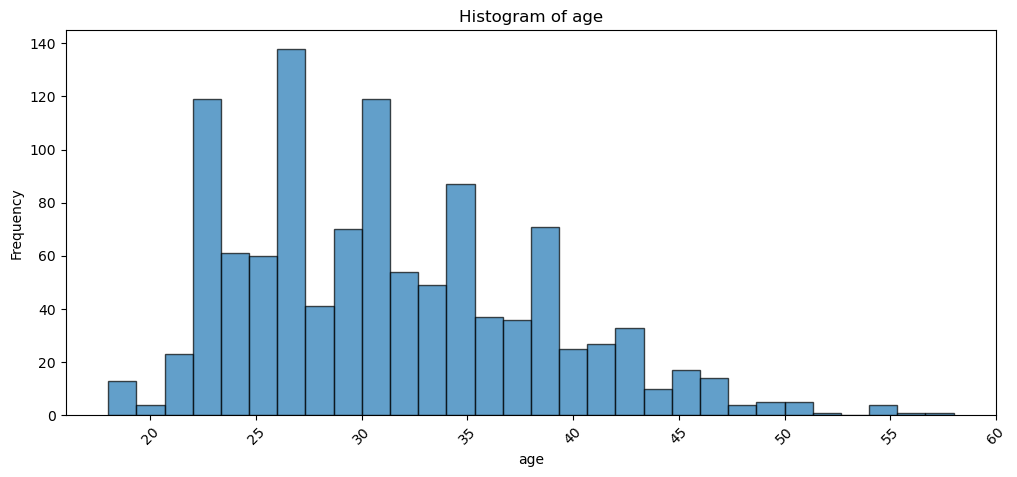

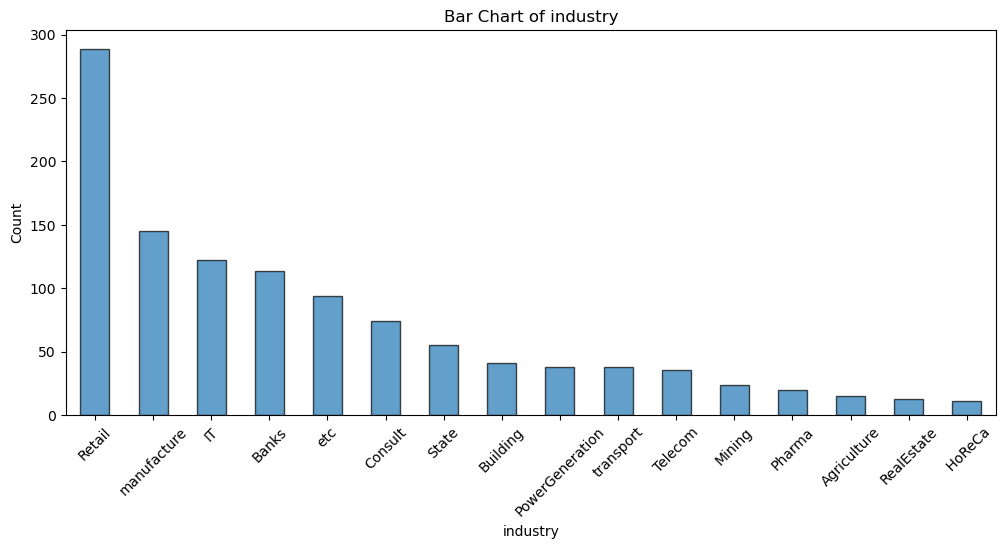

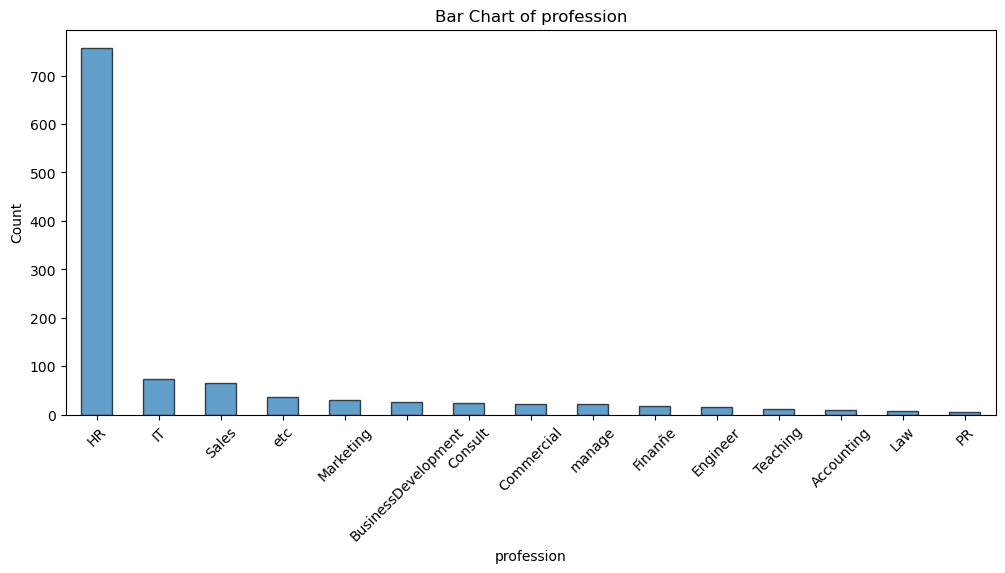

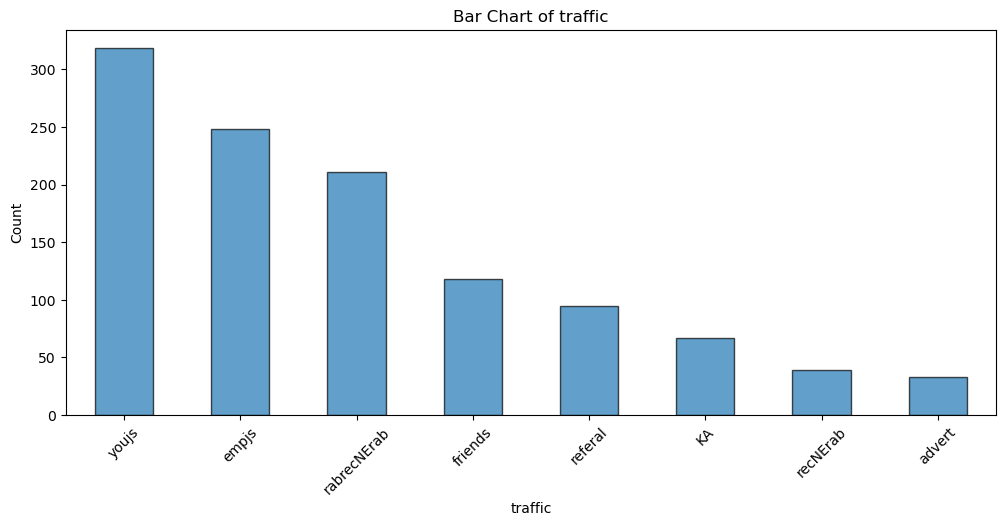

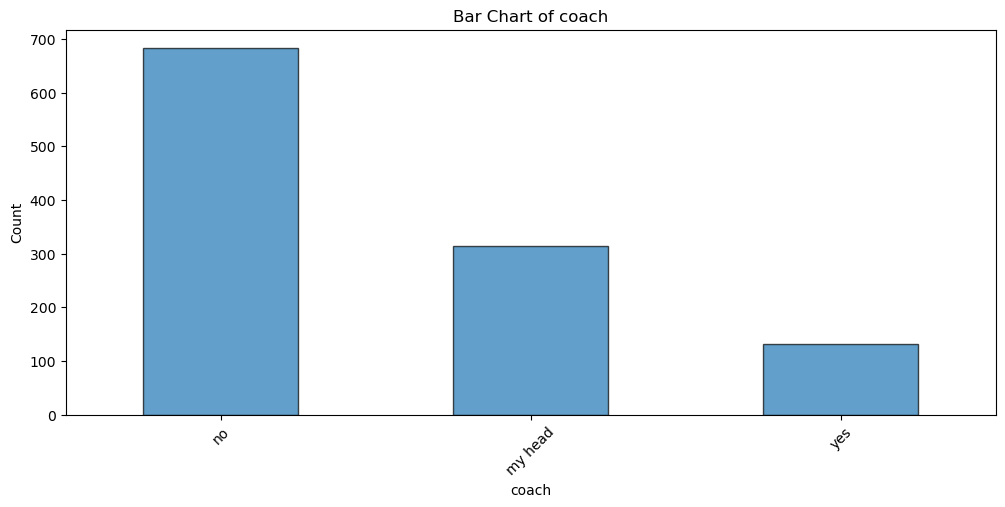

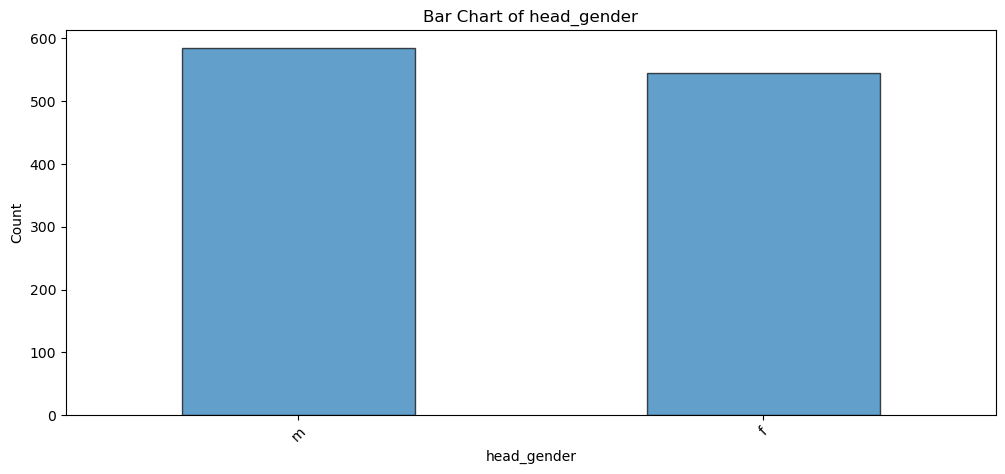

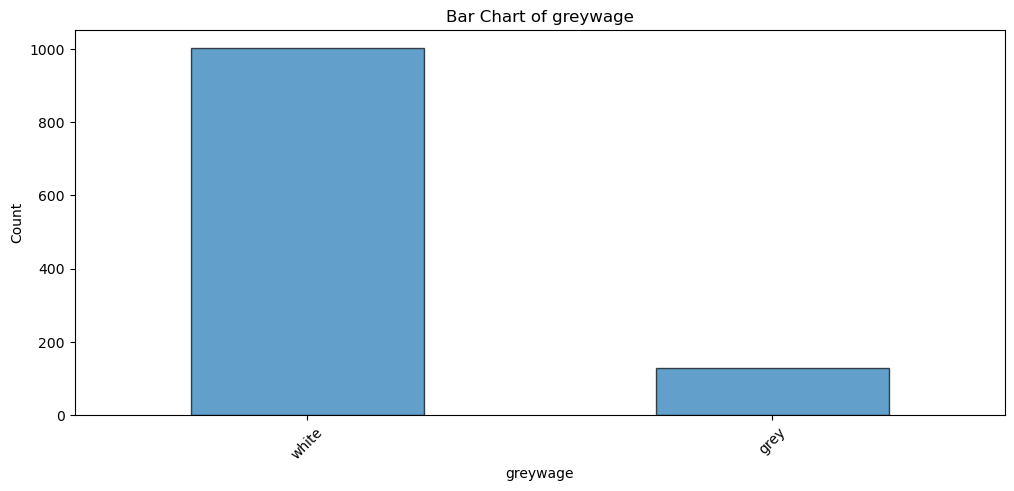

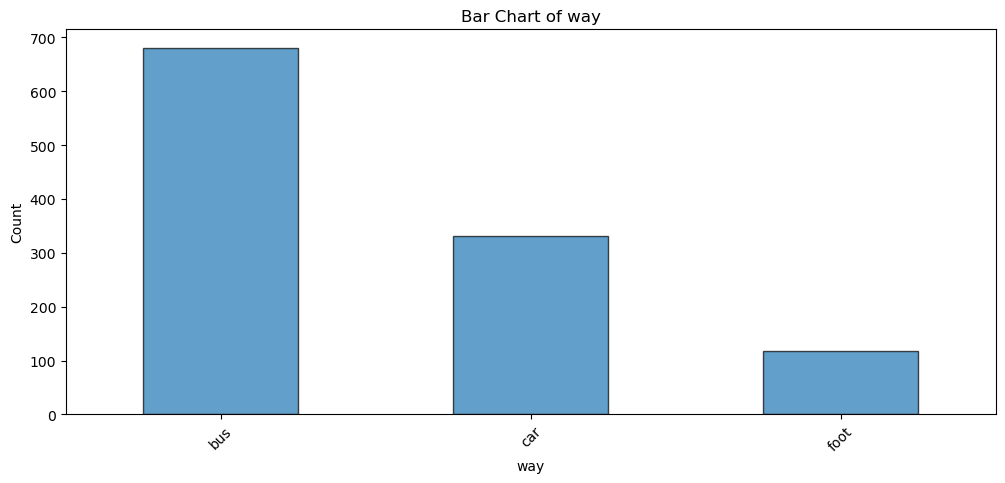

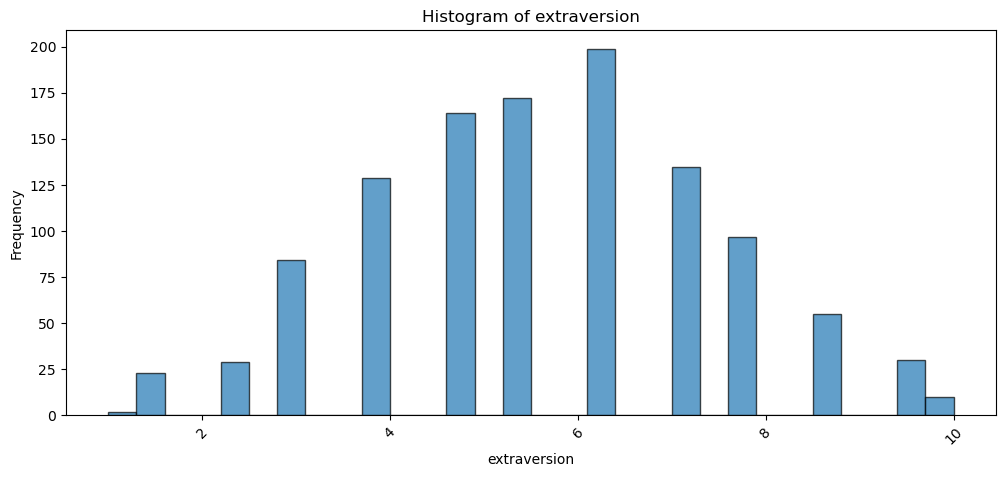

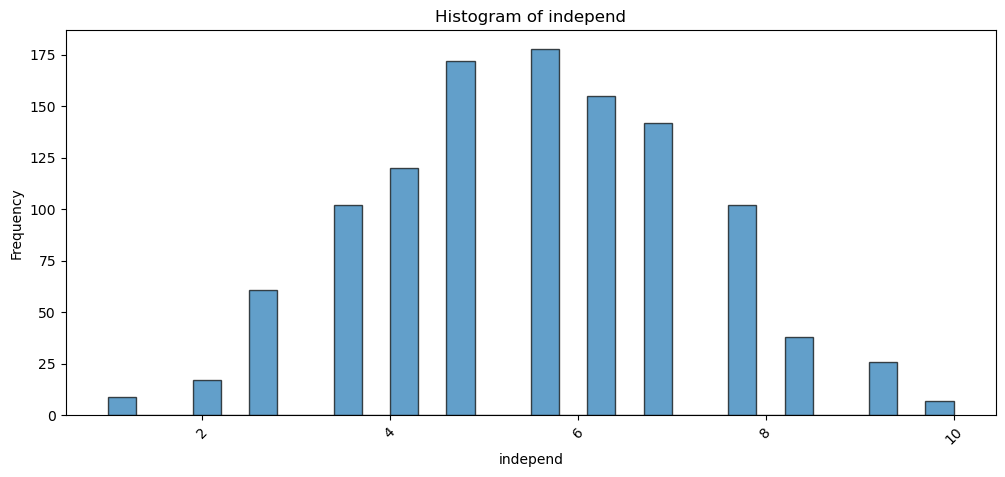

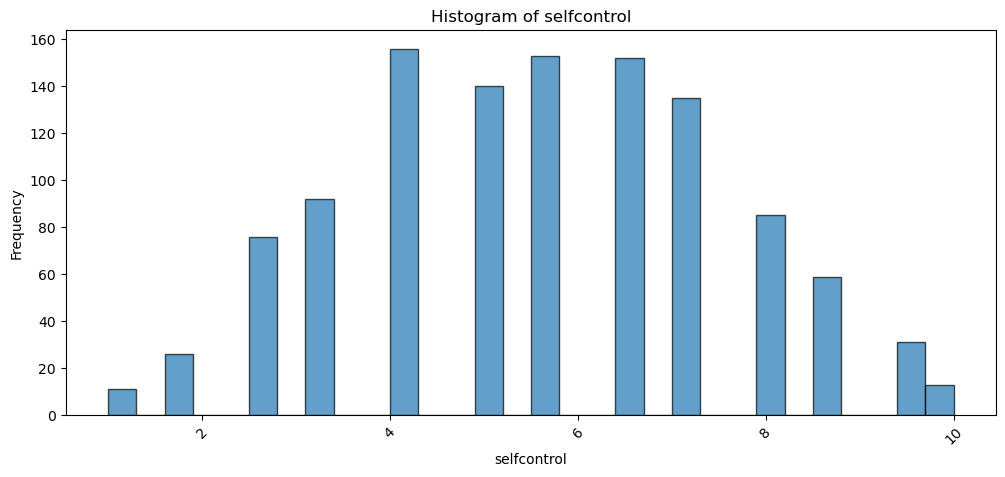

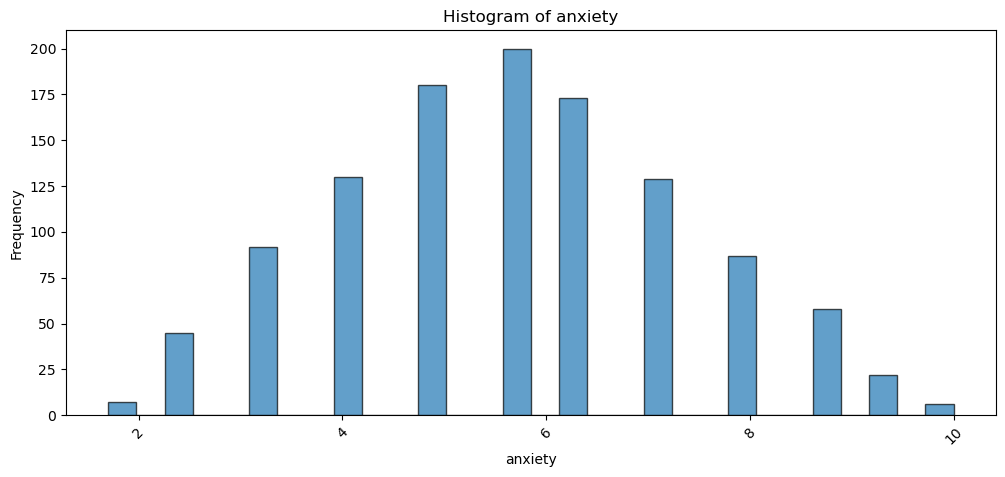

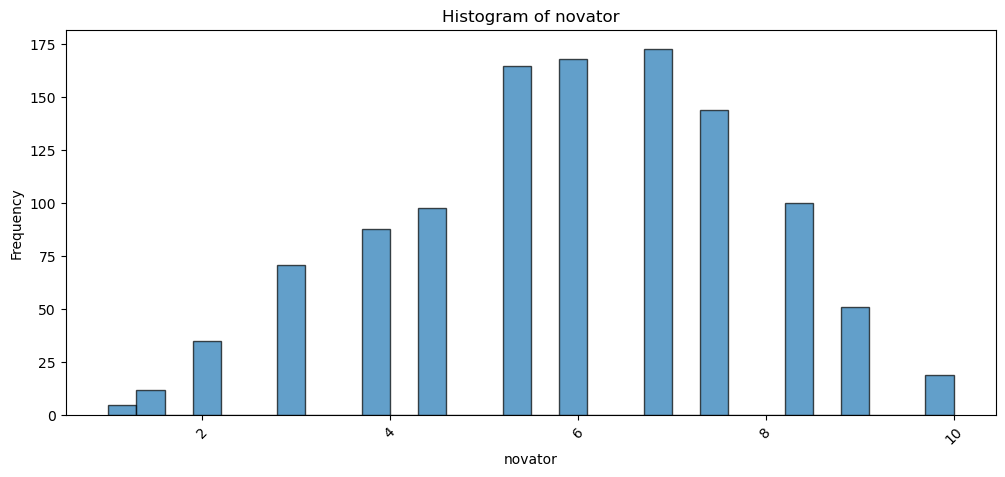

In [9]:
for column in df.columns:
	plt.figure(figsize=(12, 5))
	series = df[column].dropna()
	if series.dtype == 'object':
		series.value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
		plt.title(f'Bar Chart of {column}')
		plt.xlabel(column)
		plt.ylabel('Count')
		plt.xticks(rotation=45)
		plt.show()
	elif series.dtype in ['int64', 'float64']:
		plt.hist(series, bins=30, edgecolor='k', alpha=0.7)
		plt.title(f'Histogram of {column}')
		plt.xlabel(column)
		plt.ylabel('Frequency')
		plt.xticks(rotation=45)
		plt.show()

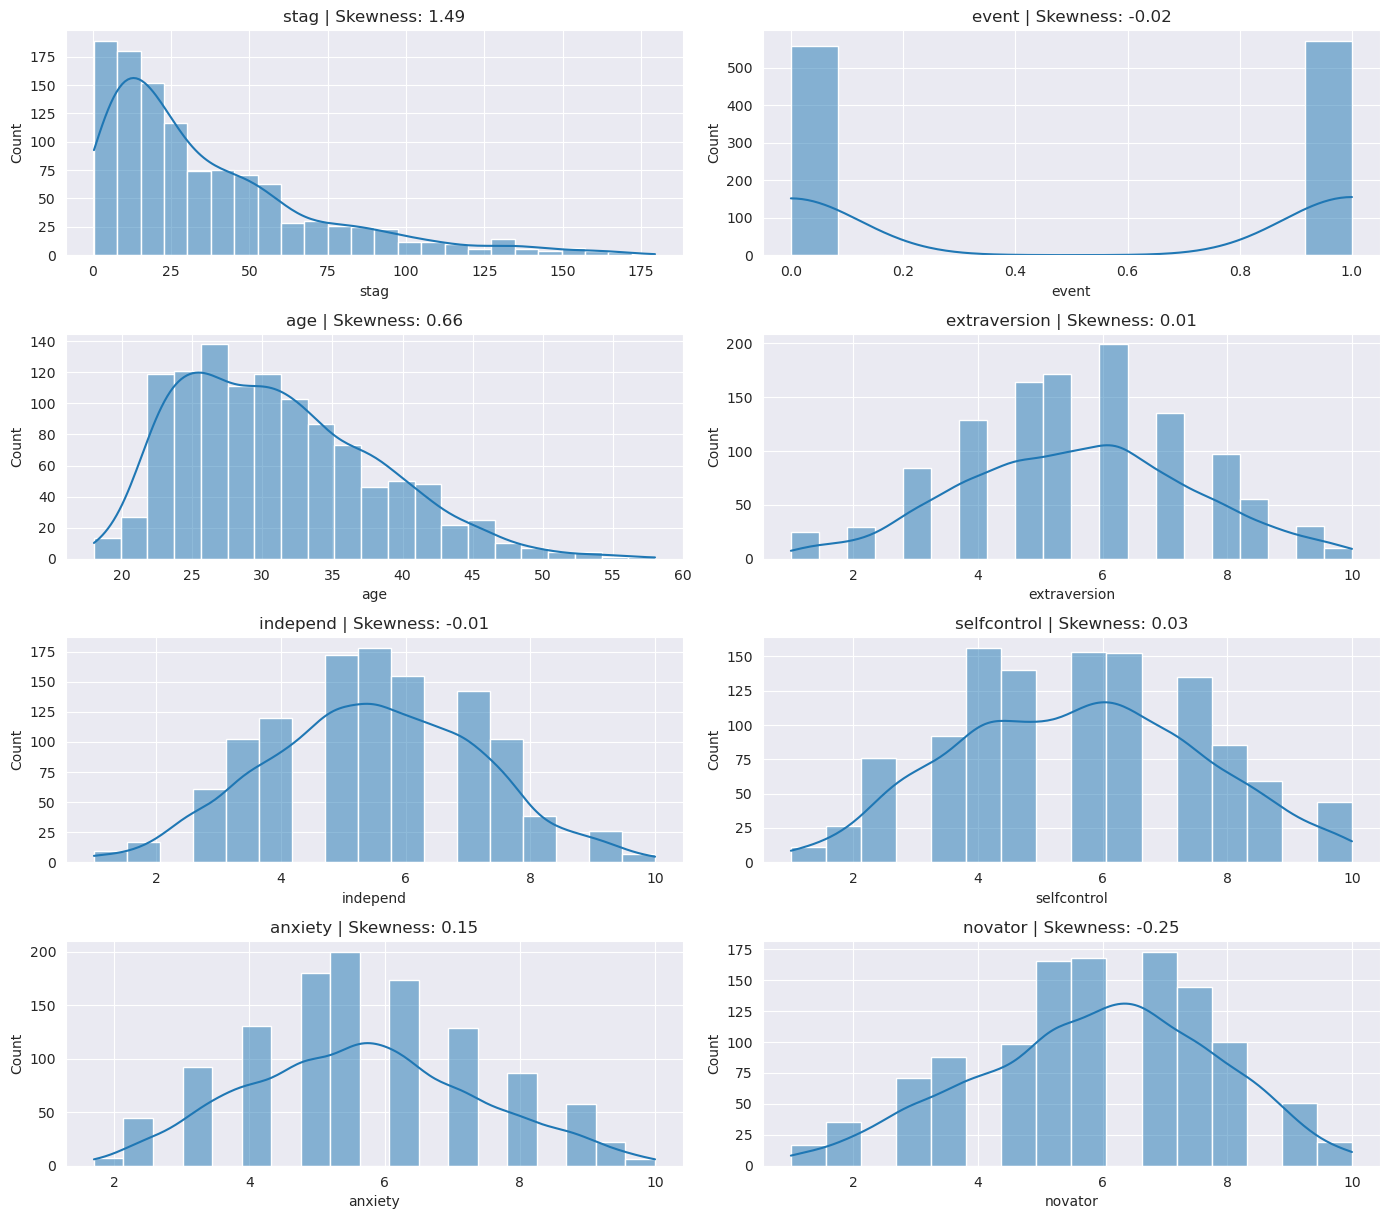

In [10]:
# Kernel Density Plot

sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

## Bivariate Analysis

Checking correlations between 2 variables

<Figure size 1000x600 with 0 Axes>

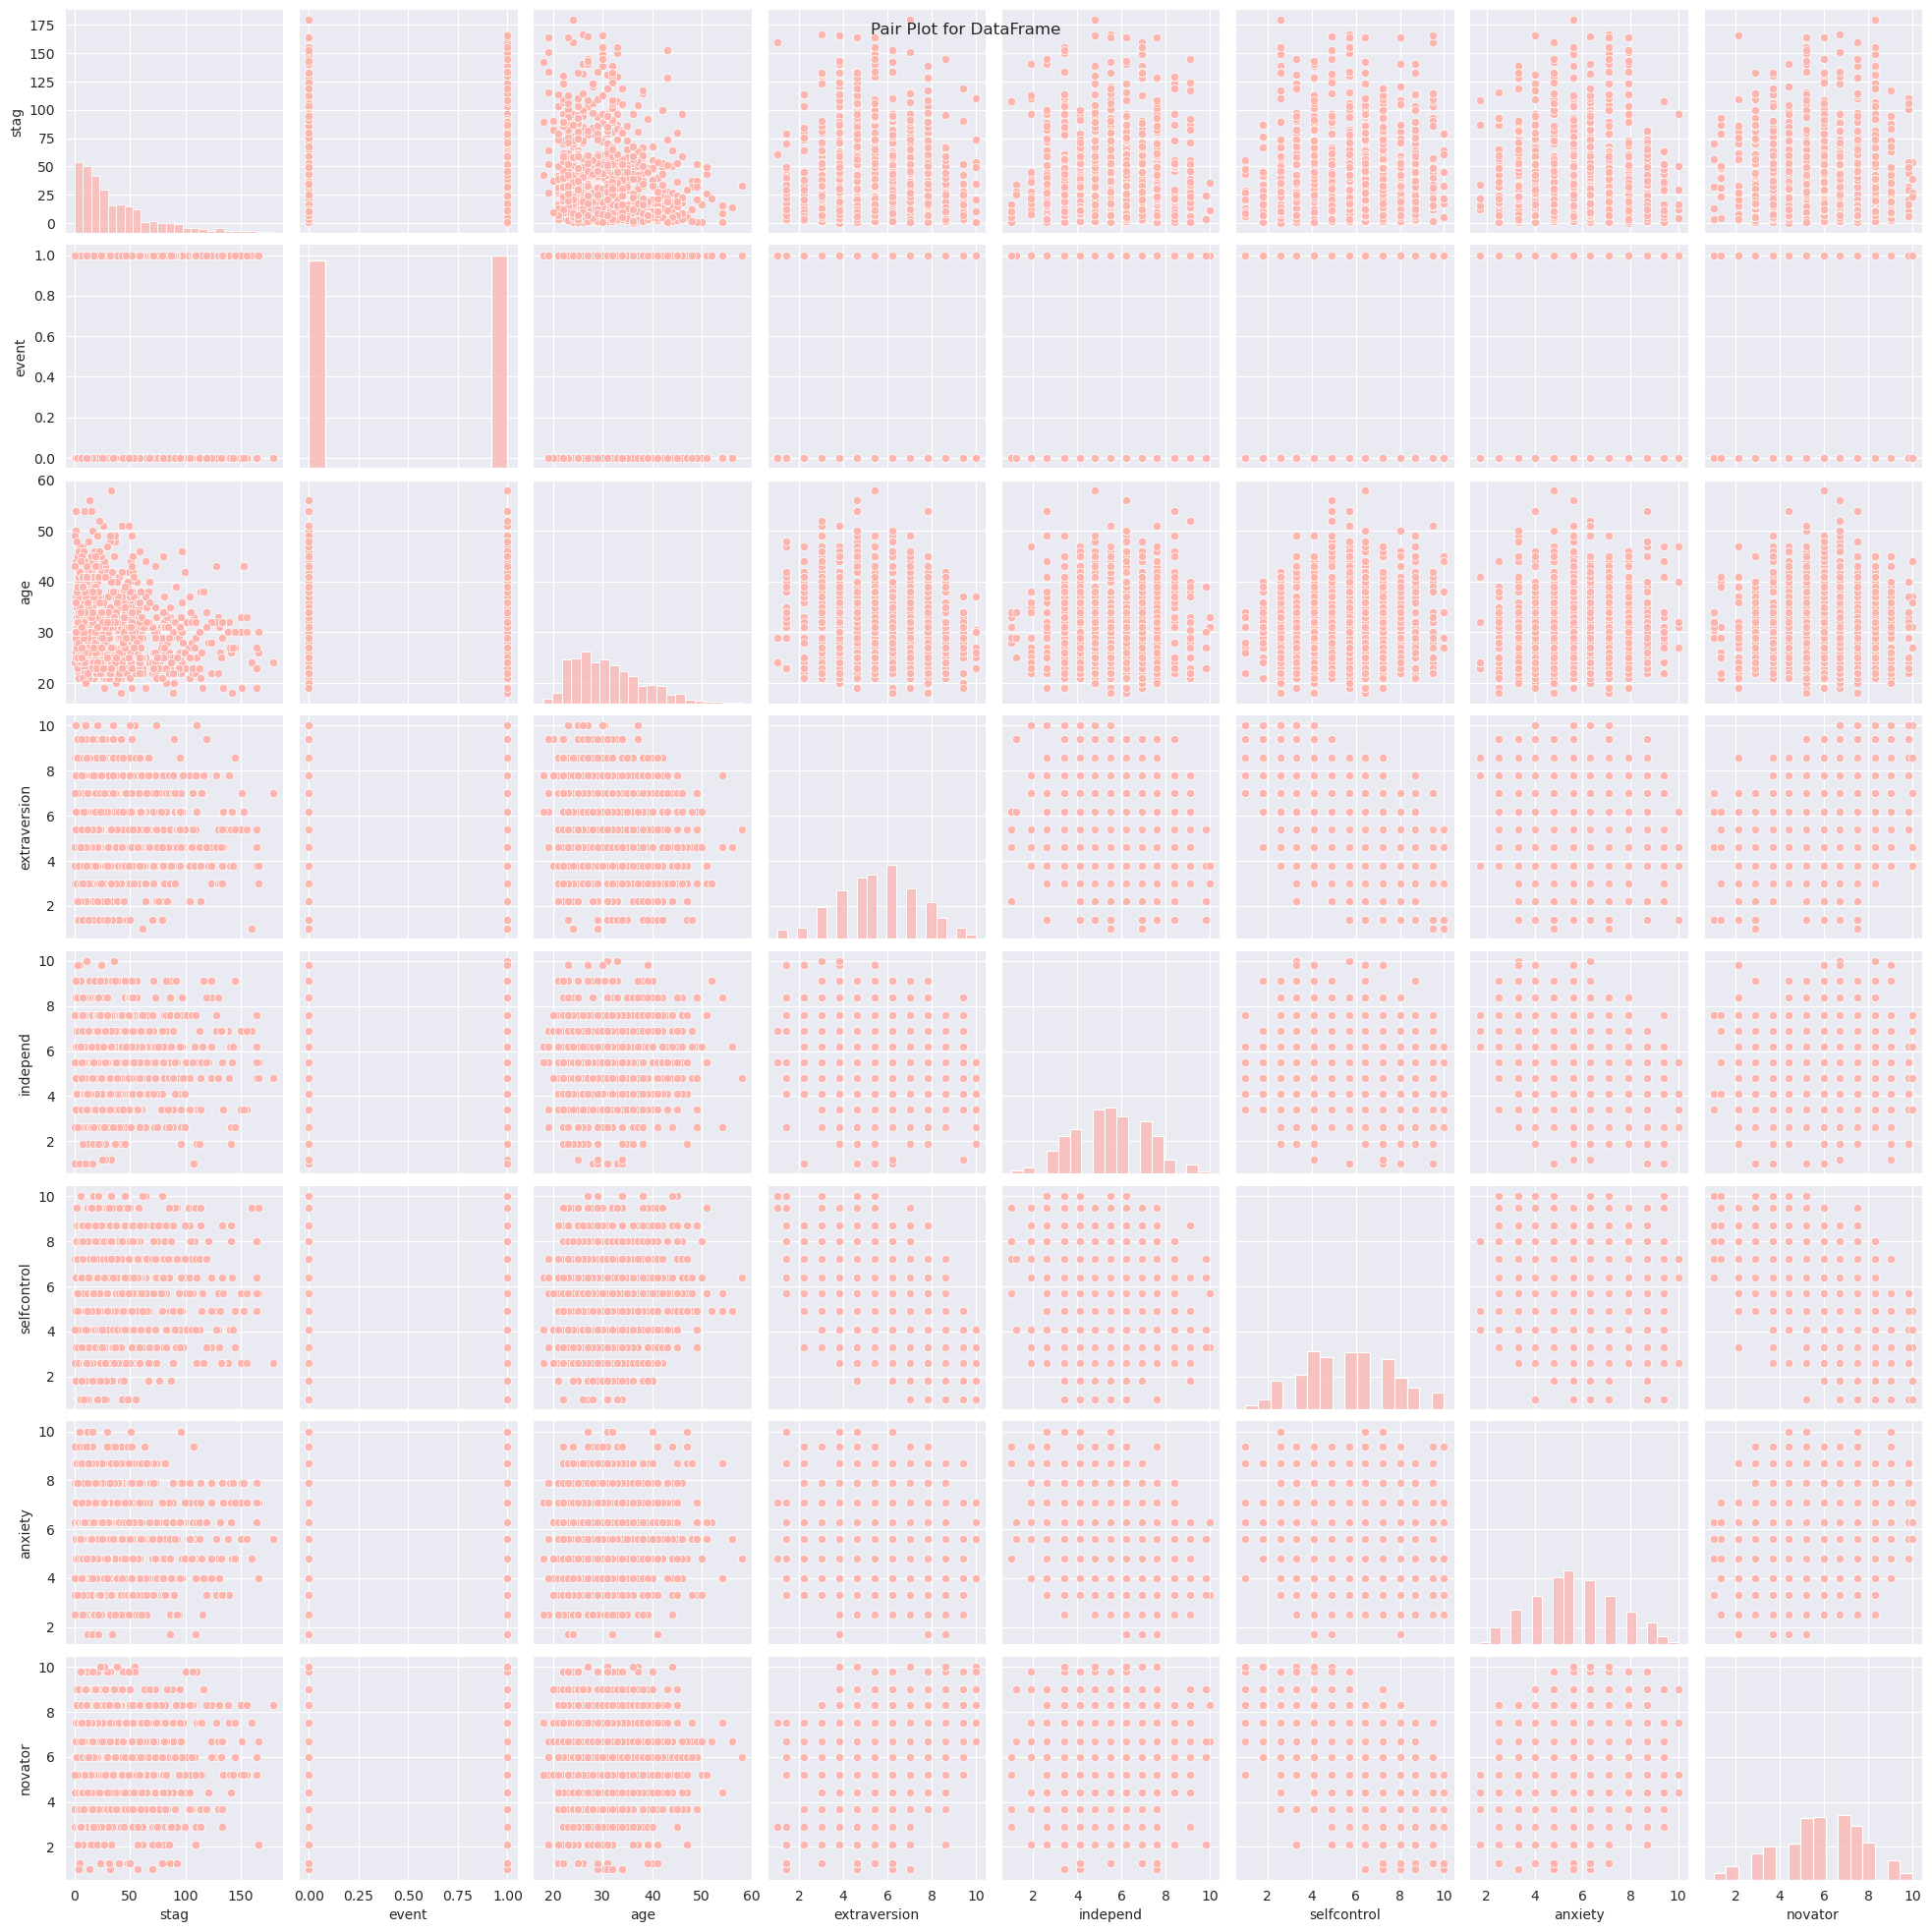

In [11]:
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

sns.pairplot(df)

plt.suptitle('Pair Plot for DataFrame')
plt.show()

## Multivariate Analysis

Checking correlations between more than 2 variables.

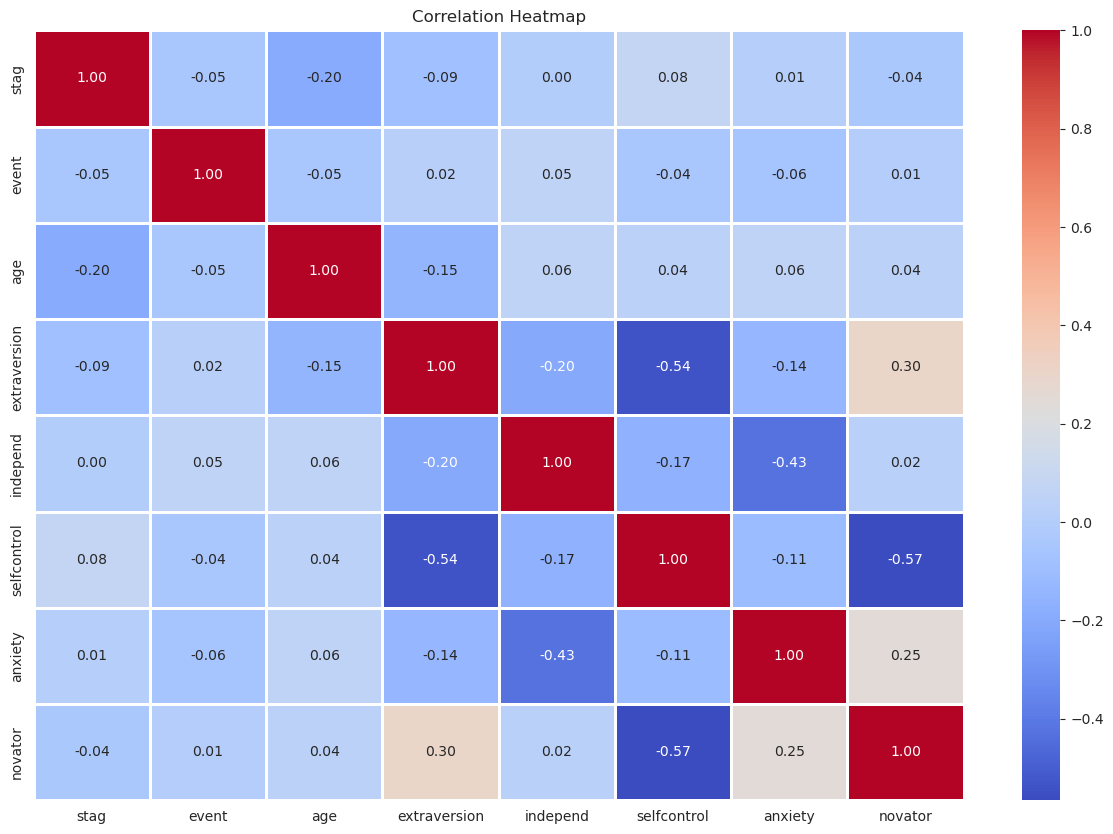

In [12]:
plt.figure(figsize=(15, 10))

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

sns.heatmap(df[numerical_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

From the above, we can observe that selfcontrol, anxiety, and novator seem to be negatively correlated, and a slightly correlation between extraversion and novator.

## Encoding categorical variables

There are a few choices of encoders we can use:
1. Label Encoding:
- Assigns a unique integer to each category in a categorical feature. This method is suitable for ordinal data where there's a meaningful order among categories (e.g., "low," "medium," "high"). However, it can introduce an artificial sense of order to nominal data, potentially misleading models.

2. One-Hot Encoding: 
- Creates new binary (0 or 1) columns for each unique category in a nominal categorical feature. A "1" in a column indicates the presence of that category, while "0" indicates its absence. This prevents the model from inferring an unintended ordinal relationship and is effective for nominal data with a relatively small number of categories.

3. Ordinal Encoding:
- Similar to label encoding but explicitly designed for ordinal data. It assigns integer values based on the inherent order of the categories.

Categorical columns (all nominal):
1. 'gender' - binary encoding
2. 'industry' - one hot
3. 'profession' - one hot
4. 'traffic' - one hot
5. 'coach' - one hot
6. 'head_gender' - binary encoding
7. 'greywage' - binary encoding
8. 'way' - one hot


In [13]:
for column in df.columns:
	if df[column].dtype == 'object':
		print(f"Unique values in column '{column}': {df[column].unique()}")
		print (f"Number of unique values in column '{column}': {df[column].nunique()}")
	
	
 	
  
for column in categorical:
	if df[column].nunique() == 2:
		print (f"Converting column '{column}' to binary numerical values.")
		df[column] = df[column].apply(lambda x: 1 if x == df[column].unique()[0] else 0)
	elif df[column].nunique() > 2 and df[column].dtype == 'object':
		print (f"Encoding categorical column '{column}' using OneHotEncoder.")
		df = pd.get_dummies(df, columns=[column], drop_first=True)
  
# I drop the first row to avoid multicollinearity


Unique values in column 'gender': ['m' 'f']
Number of unique values in column 'gender': 2
Unique values in column 'industry': ['Banks' 'PowerGeneration' 'Retail' 'manufacture' 'Consult' 'State' 'etc'
 'Building' 'IT' ' HoReCa' 'Telecom' 'Pharma' 'Mining' 'transport'
 'Agriculture' 'RealEstate']
Number of unique values in column 'industry': 16
Unique values in column 'profession': ['HR' 'Commercial' 'Marketing' 'etc' 'Sales' 'BusinessDevelopment'
 'Finanñe' 'Teaching' 'manage' 'IT' 'Law' 'Consult' 'Engineer' 'PR'
 'Accounting']
Number of unique values in column 'profession': 15
Unique values in column 'traffic': ['rabrecNErab' 'empjs' 'youjs' 'referal' 'advert' 'KA' 'recNErab'
 'friends']
Number of unique values in column 'traffic': 8
Unique values in column 'coach': ['no' 'yes' 'my head']
Number of unique values in column 'coach': 3
Unique values in column 'head_gender': ['f' 'm']
Number of unique values in column 'head_gender': 2
Unique values in column 'greywage': ['white' 'grey']
Nu

In [14]:
print (df.columns.to_list())
df.head()
print (df.info())
print (len(df.columns))

['stag', 'event', 'gender', 'age', 'head_gender', 'greywage', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator', 'industry_Agriculture', 'industry_Banks', 'industry_Building', 'industry_Consult', 'industry_IT', 'industry_Mining', 'industry_Pharma', 'industry_PowerGeneration', 'industry_RealEstate', 'industry_Retail', 'industry_State', 'industry_Telecom', 'industry_etc', 'industry_manufacture', 'industry_transport', 'profession_BusinessDevelopment', 'profession_Commercial', 'profession_Consult', 'profession_Engineer', 'profession_Finanñe', 'profession_HR', 'profession_IT', 'profession_Law', 'profession_Marketing', 'profession_PR', 'profession_Sales', 'profession_Teaching', 'profession_etc', 'profession_manage', 'traffic_advert', 'traffic_empjs', 'traffic_friends', 'traffic_rabrecNErab', 'traffic_recNErab', 'traffic_referal', 'traffic_youjs', 'coach_no', 'coach_yes', 'way_car', 'way_foot']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data column

## Scaling sets and then splitting them

Why is Feature Scaling necessary? (From Medium)
Feature scaling involves transforming numerical feature values to a comparable range, mitigating bias in supervised learning models. Neglecting scaling can unevenly influence linear regression, favoring some variables unfairly and disadvantaging certain classes during model training. Scaling algorithms are crucial to standardize feature values and ensure equitable performance.

1. StandardScalar
- Scaling them to have a mean of 0 and a standard deviation of 1.

Advantages:

It shifts data to a mean of zero, advantageous for methods relying on zero-centered input, like principal component analysis (PCA).
It standardizes data to unit variance, useful when features exhibit varying variances and require normalization for equitable treatment.

Disadvantages:

It might not be suitable for data containing outliers, as the scaling relies on mean and standard deviation, making outliers disproportionately influential.
It might not be suitable for data with non-normal distributions, as it assumes a normal distribution pattern.

2. MinMaxScaler
- MinMaxScaler is a data preprocessing technique in machine learning that scales numerical features to a specific range, usually between 0 and 1.

Advantages:

It maintains the relative data relationships by linearly scaling them within a predefined range.
It’s suitable for algorithms sensitive to feature scale, like support vector machines and neural networks with input-sensitive activation functions.
Disadvantages:

It might not be appropriate for data containing outliers, as scaling hinges on minimum and maximum values, allowing outliers to disproportionately affect the process.
It might not be suitable for data exhibiting non-uniform distributions, as it has the potential to compress the data toward the outer boundaries of the scaling range.

3. RobustScaler
- Scales with median and IQR instead.

For this project, I'll just use StandardScalar

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('event', axis=1)
y = df['event']
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [16]:
print ("Transformed DataFrame:")
print (X_scaled.head())

Transformed DataFrame:
       stag    gender       age  head_gender  greywage  extraversion  \
0 -0.868410  1.758004  0.562421     1.035162  0.356015      0.328297   
1 -0.400875  1.758004  0.276422    -0.966033  0.356015      0.328297   
2 -0.607169 -0.568827  0.562421    -0.966033  0.356015      0.328297   
3 -0.607169 -0.568827  0.562421    -0.966033  0.356015     -0.103945   
4 -0.827923  1.758004  0.133423     1.035162  0.356015     -1.400670   

   independ  selfcontrol   anxiety   novator  ...  traffic_empjs  \
0 -0.809390     0.051912  0.839587  1.271757  ...      -0.530564   
1 -0.809390     0.051912  0.839587  1.271757  ...       1.884786   
2  0.424048    -1.514359 -0.506687  1.271757  ...      -0.530564   
3  1.246340    -0.352287 -1.852961  0.431055  ...      -0.530564   
4 -0.809390     1.213984  0.839587 -1.145260  ...      -0.530564   

   traffic_friends  traffic_rabrecNErab  traffic_recNErab  traffic_referal  \
0        -0.341637             2.085836         -0.189156

## Splitting data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print (f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print (f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

print (X_train.head())
print (y_train.head())

X_train shape: (903, 50), y_train shape: (903,)
X_test shape: (226, 50), y_test shape: (226,)
          stag    gender       age  head_gender  greywage  extraversion  \
490   2.060190 -0.568827 -1.296568     1.035162  0.356015      0.760539   
394   2.734019 -0.568827 -1.296568     1.035162 -2.808872     -1.400670   
596  -1.005297 -0.568827 -0.438573    -0.966033  0.356015      0.760539   
887  -0.917574 -0.568827  0.419422     1.035162  0.356015      0.328297   
1103 -0.585961 -0.568827  0.991418     1.035162  0.356015     -0.103945   

      independ  selfcontrol   anxiety   novator  ...  traffic_empjs  \
490  -1.220536    -0.756486  0.371318  1.271757  ...      -0.530564   
394  -0.398244     0.051912 -0.506687 -1.145260  ...      -0.530564   
596   0.835194    -1.514359 -0.974956 -0.357103  ...       1.884786   
887   0.012902     0.405586  0.839587  0.063248  ...      -0.530564   
1103 -0.398244     0.051912 -0.974956 -1.145260  ...      -0.530564   

      traffic_friends  traff

## Initializing models

For this project, I'll try LogisticRegression for classification, then RandomForest.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)	
y_pred = lr.predict(X_test)


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))
print ("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print (f"F1: {f1_score(y_test, y_pred)}")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       108
           1       0.71      0.63      0.67       118

    accuracy                           0.67       226
   macro avg       0.68      0.67      0.67       226
weighted avg       0.68      0.67      0.67       226

Confusion Matrix:
[[78 30]
 [44 74]]
F1: 0.6666666666666666


In [33]:
# Tuning LR
from sklearn.model_selection import GridSearchCV

param_grid = {
	'C': [0.01, 0.1, 1, 10, 100],
	'solver': ['liblinear', 'saga', 'lbfgs'],
	'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1', verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s


[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................

/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/anselmlong/miniconda3/envs/env/lib/

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Evaluating a model with the best parameters
best_lr = LogisticRegression(**grid_search.best_params_, max_iter=1000)
best_lr.fit(X_train, y_train)
y_pred = best_lr.predict(X_test)

print ("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))
print ("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print (f"F1: {f1_score(y_test, y_pred)}")
print (f"Accuracy: {accuracy_score(y_test, y_pred)}")
print (f"Precision: {precision_score(y_test, y_pred)}")
print (f"Recall: {recall_score(y_test, y_pred)}")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.72      0.68       108
           1       0.71      0.63      0.67       118

    accuracy                           0.67       226
   macro avg       0.68      0.67      0.67       226
weighted avg       0.68      0.67      0.67       226

Confusion Matrix:
[[78 30]
 [44 74]]
F1: 0.6666666666666666
Accuracy: 0.672566371681416
Precision: 0.7115384615384616
Recall: 0.6271186440677966


## Trying Random Forest instead

Logistic isn't the best for this.

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print ("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))
print ("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print (f"F1: {f1_score(y_test, y_pred)}")
print (f"Accuracy: {accuracy_score(y_test, y_pred)}")
print (f"Precision: {precision_score(y_test, y_pred)}")
print (f"Recall: {recall_score(y_test, y_pred)}")

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       108
           1       0.75      0.71      0.73       118

    accuracy                           0.73       226
   macro avg       0.73      0.73      0.73       226
weighted avg       0.73      0.73      0.73       226

Confusion Matrix:
[[80 28]
 [34 84]]
F1: 0.7304347826086957
Accuracy: 0.7256637168141593
Precision: 0.75
Recall: 0.711864406779661


In [32]:
# Tuning RF

param_grid = {
	'n_estimators': [50, 100, 200],
	'max_depth': [None, 10, 20, 30],
	'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, verbose=2, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_s

In [34]:
# After grid_search.fit(...)
results = pd.DataFrame(grid_search.cv_results_)

# For each parameter set, print the F1 score for each fold
mean_scores = results['mean_test_score']
std_scores = results['std_test_score']
split_scores = [col for col in results.columns if col.startswith('split') and col.endswith('_test_score')]

for i, params in enumerate(results['params']):
    print(f"Params: {params}")
    for split in split_scores:
        print(f"  {split}: {results.loc[i, split]:.4f}")
    print(f"  Mean F1: {mean_scores[i]:.4f} ± {std_scores[i]:.4f}\n")

Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
  split0_test_score: 0.0000
  split1_test_score: 0.0000
  split2_test_score: 0.0000
  split3_test_score: 0.0000
  split4_test_score: 0.0000
  Mean F1: 0.0000 ± 0.0000

Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
  split0_test_score: 0.6691
  split1_test_score: 0.6691
  split2_test_score: 0.6691
  split3_test_score: 0.6667
  split4_test_score: 0.6667
  Mean F1: 0.6681 ± 0.0012

Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}
  split0_test_score: nan
  split1_test_score: nan
  split2_test_score: nan
  split3_test_score: nan
  split4_test_score: nan
  Mean F1: nan ± nan

Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
  split0_test_score: 0.5618
  split1_test_score: 0.5355
  split2_test_score: 0.6162
  split3_test_score: 0.6102
  split4_test_score: 0.5610
  Mean F1: 0.5769 ± 0.0311

Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
  split0_test_score: 0.5618
  split1_test_score: 0.5355
  split

In [31]:
# Training with best parameters
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
print ("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))
print ("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print (f"F1: {f1_score(y_test, y_pred)}")
print (f"Accuracy: {accuracy_score(y_test, y_pred)}")
print (f"Precision: {precision_score(y_test, y_pred)}")
print (f"Recall: {recall_score(y_test, y_pred)}")

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       108
           1       0.73      0.75      0.74       118

    accuracy                           0.73       226
   macro avg       0.73      0.72      0.72       226
weighted avg       0.73      0.73      0.73       226

Confusion Matrix:
[[76 32]
 [30 88]]
F1: 0.7394957983193278
Accuracy: 0.7256637168141593
Precision: 0.7333333333333333
Recall: 0.7457627118644068


/tmp/ipykernel_19961/761912496.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")


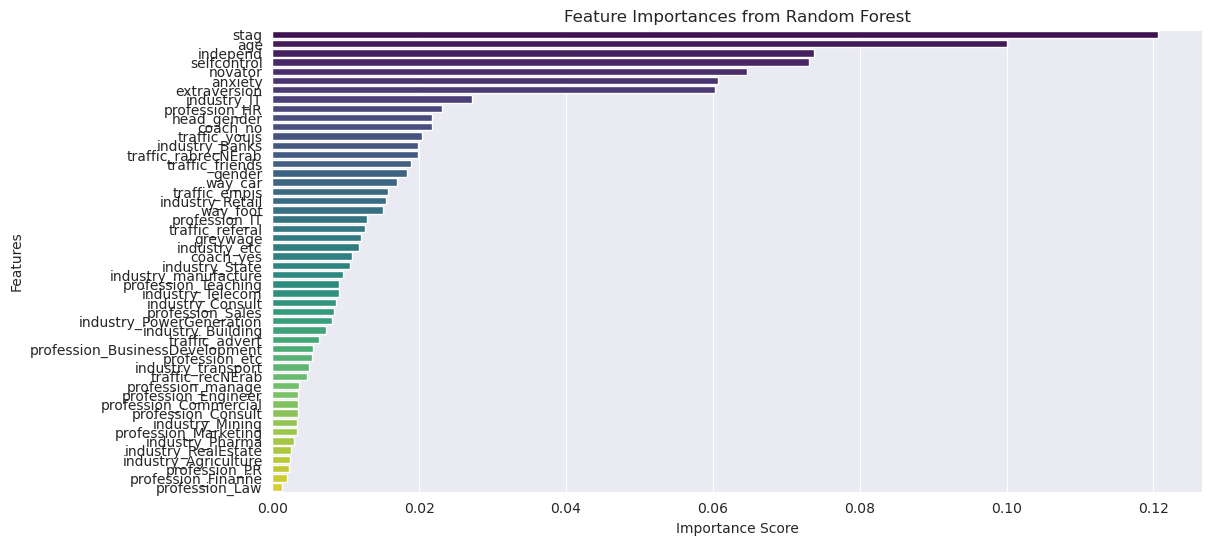

In [36]:
# Looking at feature importance
importances = best_rf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis")
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Feature Importance for RF

Looks like stag, age, and independence are the top motivators, which align with common reasons why one might leave a job. I will keep the top 15 features and train again.

In [37]:
print("Top 15 Important Features:")
print(feature_importances.head(15))
X_train_important = X_train[feature_importances.head(15).index]
X_test_important = X_test[feature_importances.head(15).index]

# New RF
rf_model_important = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10, min_samples_split=2)

Top 15 Important Features:
stag                   0.120653
age                    0.100041
independ               0.073733
selfcontrol            0.073151
novator                0.064633
anxiety                0.060693
extraversion           0.060241
industry_IT            0.027166
profession_HR          0.023104
head_gender            0.021775
coach_no               0.021746
traffic_youjs          0.020319
industry_Banks         0.019899
traffic_rabrecNErab    0.019850
traffic_friends        0.018900
dtype: float64


In [38]:
rf_model_important.fit(X_train_important, y_train)
y_pred_important = rf_model_important.predict(X_test_important)
print ("Classification Report for Random Forest with Important Features:")
print(classification_report(y_test, y_pred_important))
print ("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_important))
print (f"F1: {f1_score(y_test, y_pred_important)}")


Classification Report for Random Forest with Important Features:
              precision    recall  f1-score   support

           0       0.60      0.62      0.61       108
           1       0.64      0.62      0.63       118

    accuracy                           0.62       226
   macro avg       0.62      0.62      0.62       226
weighted avg       0.62      0.62      0.62       226

Confusion Matrix:
[[67 41]
 [45 73]]
F1: 0.6293103448275862


## Trying deep learning on this instead

If classical machine learning fails, we can try a non-linear method.

Adding dropout to prevent overfitting.

In [93]:
# Let's try deep learning on this instead, using a neural network
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class SimpleNN(nn.Module):
	def __init__(self, input_size):
		super(SimpleNN, self).__init__()
		self.fc1 = nn.Linear(input_size, 32)
		self.dropout1 = nn.Dropout(0.2)
		self.fc2 = nn.Linear(32, 1)
	
	def forward(self, x):
		x = F.relu(self.fc1(x))
		x = self.dropout1(x)
		x = F.relu(self.fc2(x))
		x = torch.sigmoid(x)
		return x


In [94]:
# Checking my X_train and y_train
print (X_train.shape)
print (y_train.shape)
print (X_train.head())
print (y_train.head())

(903, 50)
(903,)
          stag    gender       age  head_gender  greywage  extraversion  \
490   2.060190 -0.568827 -1.296568     1.035162  0.356015      0.760539   
394   2.734019 -0.568827 -1.296568     1.035162 -2.808872     -1.400670   
596  -1.005297 -0.568827 -0.438573    -0.966033  0.356015      0.760539   
887  -0.917574 -0.568827  0.419422     1.035162  0.356015      0.328297   
1103 -0.585961 -0.568827  0.991418     1.035162  0.356015     -0.103945   

      independ  selfcontrol   anxiety   novator  ...  traffic_empjs  \
490  -1.220536    -0.756486  0.371318  1.271757  ...      -0.530564   
394  -0.398244     0.051912 -0.506687 -1.145260  ...      -0.530564   
596   0.835194    -1.514359 -0.974956 -0.357103  ...       1.884786   
887   0.012902     0.405586  0.839587  0.063248  ...      -0.530564   
1103 -0.398244     0.051912 -0.974956 -1.145260  ...      -0.530564   

      traffic_friends  traffic_rabrecNErab  traffic_recNErab  traffic_referal  \
490         -0.341637   

In [95]:
model = SimpleNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
inputs = torch.FloatTensor(X_train.values)
# Unsqueeze to convert to column vector for BCEWithLogitsLoss
labels = torch.FloatTensor(y_train.values).unsqueeze(1)

In [96]:
# Split training set into train/validation for early stopping
from sklearn.model_selection import train_test_split
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
train_inputs = torch.FloatTensor(X_train_nn.values)
train_labels = torch.FloatTensor(y_train_nn.values).unsqueeze(1)
val_inputs = torch.FloatTensor(X_val_nn.values)
val_labels = torch.FloatTensor(y_val_nn.values).unsqueeze(1)

In [97]:
# Training loop with early stopping
num_epochs = 10000
patience = 1000
best_val_loss = float('inf')
epochs_no_improve = 0
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(train_inputs)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        val_losses.append(val_loss.item())
    # Early stopping check
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        epochs_no_improve = 0
        best_model_state = model.state_dict()
    else:
        epochs_no_improve += 1
    if (epoch+1) % 100 == 0 or epochs_no_improve == patience:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')
    if epochs_no_improve == patience:
        print(f'Early stopping at epoch {epoch+1}. Best val loss: {best_val_loss:.4f}')
        model.load_state_dict(best_model_state)
        break

Epoch [100/10000], Train Loss: 0.7127, Val Loss: 0.7074
Epoch [200/10000], Train Loss: 0.7003, Val Loss: 0.7073
Epoch [200/10000], Train Loss: 0.7003, Val Loss: 0.7073
Epoch [300/10000], Train Loss: 0.6945, Val Loss: 0.7072
Epoch [300/10000], Train Loss: 0.6945, Val Loss: 0.7072
Epoch [400/10000], Train Loss: 0.6916, Val Loss: 0.7080
Epoch [400/10000], Train Loss: 0.6916, Val Loss: 0.7080
Epoch [500/10000], Train Loss: 0.6890, Val Loss: 0.7087
Epoch [500/10000], Train Loss: 0.6890, Val Loss: 0.7087
Epoch [600/10000], Train Loss: 0.6860, Val Loss: 0.7082
Epoch [600/10000], Train Loss: 0.6860, Val Loss: 0.7082
Epoch [700/10000], Train Loss: 0.6870, Val Loss: 0.7086
Epoch [700/10000], Train Loss: 0.6870, Val Loss: 0.7086
Epoch [800/10000], Train Loss: 0.6843, Val Loss: 0.7085
Epoch [800/10000], Train Loss: 0.6843, Val Loss: 0.7085
Epoch [900/10000], Train Loss: 0.6838, Val Loss: 0.7080
Epoch [900/10000], Train Loss: 0.6838, Val Loss: 0.7080
Epoch [1000/10000], Train Loss: 0.6838, Val Loss

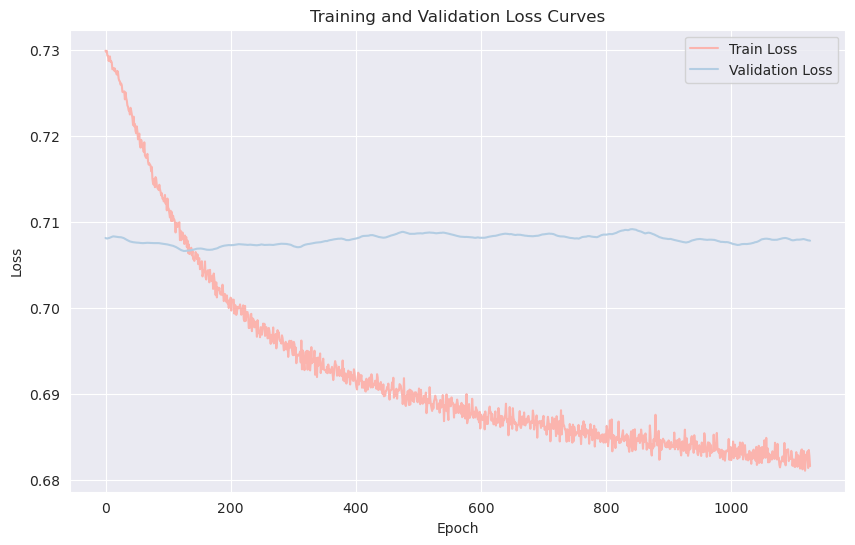

Training set class balance:
event
0    0.511076
1    0.488924
Name: proportion, dtype: float64
Validation set class balance:
event
1    0.531365
0    0.468635
Name: proportion, dtype: float64


In [98]:
# Diagnostics: Plot training/validation loss curves and check class balance
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

# Check class balance in train/val sets
print('Training set class balance:')
print(y_train_nn.value_counts(normalize=True))
print('Validation set class balance:')
print(y_val_nn.value_counts(normalize=True))

In [99]:
with torch.no_grad():
	model.eval()
	outputs = model(inputs)
	preds = (outputs > 0.5).float()  # Threshold at 0.5 for binary classification
 
print ("Classification Report for Neural Network:")
print(classification_report(y_train, preds.numpy()))
print ("Confusion Matrix:")
print(confusion_matrix(y_train, preds.numpy()))
print (f"F1: {f1_score(y_train, preds.numpy())}")

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       450
           1       0.88      0.65      0.74       453

    accuracy                           0.78       903
   macro avg       0.80      0.78      0.77       903
weighted avg       0.80      0.78      0.77       903

Confusion Matrix:
[[409  41]
 [160 293]]
F1: 0.7445997458703939


In [100]:
# Performance on test set
test_inputs = torch.FloatTensor(X_test.values)
with torch.no_grad():
	model.eval()
	outputs = model(test_inputs)
	preds = (outputs > 0.5).float()  # Threshold at 0.5 for binary classification

print ("Classification Report for Neural Network - unseen test set:")
print(classification_report(y_test, preds.numpy()))
print ("Confusion Matrix:")
print(confusion_matrix(y_test, preds.numpy()))
print (f"F1: {f1_score(y_test, preds.numpy())}")

Classification Report for Neural Network - unseen test set:
              precision    recall  f1-score   support

           0       0.62      0.79      0.70       108
           1       0.74      0.57      0.64       118

    accuracy                           0.67       226
   macro avg       0.68      0.68      0.67       226
weighted avg       0.69      0.67      0.67       226

Confusion Matrix:
[[85 23]
 [51 67]]
F1: 0.6442307692307693


## Overfitting


We have training f1 being much higher than test F1 - 0.881 vs 0.613. I will introduce some drop out to reduce overfitting.

After playing around, it seems like 1000 data points is too little for a neural network to generalise on this data.
Let me try another algorithm.


# XGBoost


In [18]:
import xgboost as xgb

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print (f"F1: {f1_score(y_test, y_pred)}")

(903, 50)
(903,)
(226, 50)
(226,)
Accuracy: 0.690
F1: 0.6956521739130435


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

param_dist = {
	'n_estimators': [50, 100, 200, 400],
	'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
	'max_depth': [3, 4, 6, 8, 10],
	'subsample': [0.6, 0.75, 0.85, 1.0],
	'colsample_bytree': [0.5, 0.7, 0.85, 1.0],
	'gamma': [0, 0.1, 0.5, 1, 5],
	'reg_alpha': [0, 0.01, 0.1, 1],
	'reg_lambda': [0.5, 1, 5, 10]
}

rs = RandomizedSearchCV(
	estimator=xgb_clf,
	param_distributions=param_dist,
	n_iter=50,
	scoring='f1',
	cv=5,
	verbose=2,
	n_jobs=-1,
	random_state=42
)

rs.fit(X_train, y_train)

print("Best params:", rs.best_params_)
print("Best CV F1:", rs.best_score_)

# Inspect top results
results_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
print(results_df[['rank_test_score', 'mean_test_score', 'std_test_score', 'params']].head(10))

# Evaluate best estimator on the test set
best_xgb = rs.best_estimator_
y_pred = best_xgb.predict(X_test)

print("Test set metrics:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"F1: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=o

[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.85; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.85; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.85; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.85; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=4, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.85; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=1, reg_lambda=0.5, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.03, max_dep

/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=o

[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=8, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.85, gamma=0.5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=0.01, reg_lambda=1, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_depth=4, n_estimators=200, reg_alpha=1, reg_lambda=0.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=8, n_estimators=100, reg_alpha=0.01, reg_lambda=10, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.03, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.05, max_dept

/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=o

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5, subsample=0.85; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5, subsample=0.85; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=10, n_estimators=100, reg_alpha=1, reg_lambda=5, subsample=0.75; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=8, n_estimators=100, reg_alpha=0.01, reg_lambda=10, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5, subsample=0.85; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=5, subsample=0.85; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, n_estimator

/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=o

[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=100, reg_alpha=0.1, reg_lambda=0.5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.0s

[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.05, max_depth=

/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=o

[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.03, max_depth=8, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=8, n_estimators=50, reg_alpha=0, reg_lambda=0.5, subsample=0.75; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.03, max_depth=8, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.85, gamma=0, learning_rate=0.05, max_depth=6, n_estimators=200, reg_alpha=0.01, reg_lambda=1, subsample=0.75; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.03, max_depth=8, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=5, learning_rate=0.03, max_depth=8, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth

/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=o

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.85, gamma=0, learning_rate=0.01, max_depth=8, n_estimators=200, reg_alpha=0.01, reg_lambda=10, subsample=0.75; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.85, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5, subsample=0.75; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.85, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=0, reg_lambda=0.5, subsample=0.75; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=3, n_es

/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=o

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=8, n_estimators=200, reg_alpha=1, reg_lambda=5, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=6, n_estimators=50, reg_alpha=0.01, reg_lambda=1, subsample=0.75; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=6, n_estimators=50, reg_alpha=0.01, reg_lambda=1, subsample=0.75; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.05, max_depth=6, n_estimators=50, reg_alpha=0.01, reg_lambda=1, subsample=0.75; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=1, learning_rate=0.03, max_depth=10, n_estimators=400, reg_alpha=0, reg_lambda=5, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.85, gamma=1, learning_rate=0.03, max_depth=8, n_estimators=50, reg_alpha=1, reg_lambda=5, subsample=0.75; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=8, 

/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=o

[CV] END colsample_bytree=0.5, gamma=5, learning_rate=0.01, max_depth=3, n_estimators=50, reg_alpha=1, reg_lambda=5, subsample=0.85; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=8, n_estimators=200, reg_alpha=0.1, reg_lambda=5, subsample=0.75; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=8, n_estimators=200, reg_alpha=0.1, reg_lambda=5, subsample=0.75; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=8, n_estimators=200, reg_alpha=0.1, reg_lambda=5, subsample=0.75; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=8, n_estimators=200, reg_alpha=0.1, reg_lambda=5, subsample=0.75; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.01, max_depth=8, n_estimators=200, reg_alpha=0.1, reg_lambda=5, subsample=0.75; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6,

/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:55:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=o

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=6, n_estimators=400, reg_alpha=0.01, reg_lambda=5, subsample=0.85; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.2, max_depth=4, n_estimators=400, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.85, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=400, reg_alpha=1, reg_lambda=10, subsample=0.85; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, reg_alpha=1, reg_lambda=5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.85, gamma=1, learning_rate=0.01, max_depth=10, n_estimators=400, reg_alpha=1, reg_lambda=10, subsample=0.85; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.2, max_depth=4, n_estimators=400, reg_alpha=1, reg_lambda=10, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.05, max_depth=3

/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:56:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:56:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:56:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:56:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=o

[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=4, n_estimators=50, reg_alpha=1, reg_lambda=0.5, subsample=0.85; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=4, n_estimators=50, reg_alpha=1, reg_lambda=0.5, subsample=0.85; total time=   0.1s
[CV] END colsample_bytree=0.85, gamma=0, learning_rate=0.05, max_depth=8, n_estimators=100, reg_alpha=0.1, reg_lambda=5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=5, learning_rate=0.03, max_depth=8, n_estimators=400, reg_alpha=0, reg_lambda=10, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.85, gamma=0, learning_rate=0.05, max_depth=8, n_estimators=100, reg_alpha=0.1, reg_lambda=5, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=10, n_estimators=200, reg_alpha=1, reg_lambda=10, subsample=0.75; total time=   0.2s
[CV] END colsample_bytree=0.85, gamma=1, learning_rate=0.03, max_depth=3, n_

/home/anselmlong/miniconda3/envs/env/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:56:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 1.0}
Best CV F1: 0.6490446180541558
   rank_test_score  mean_test_score  std_test_score  \
0                1         0.649045        0.025678   
1                2         0.648369        0.032899   
2                3         0.646195        0.021352   
3                4         0.645119        0.035085   
4                5         0.643598        0.031744   
5                6         0.642427        0.028723   
6                7         0.641143        0.023787   
7                8         0.639459        0.031752   
8                9         0.637995        0.033378   
9               10         0.635914        0.038910   

                                              params  
0  {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha...  
1  {'subsample': 0.85, 'reg_lambda': 5, 'reg_alph...  
2  {'subsample': 0.75, 'reg_lambda': 

# Model Comparison & Project Summary

- **Classical ML models (Logistic Regression, Random Forest, XGBoost)** performed best for this tabular dataset (~1000 samples).
- **Neural networks** struggled to generalize due to limited data, showing overfitting and flat validation loss curves.
- **Random Forest and XGBoost** provided robust results and feature importance insights.
- **Key steps:**
    - Robust CSV loading and encoding
    - EDA and feature engineering
    - Careful encoding and scaling
    - Model training, hyperparameter tuning, and diagnostics
- **Best practices:**
    - Use tree-based models for small tabular datasets
    - Apply regularization and early stopping for neural nets
    - Always visualize loss curves and check class balance
- **Next steps:**
    - If more data becomes available, revisit deep learning
    - Try advanced ensemble methods or feature selection
    - Deploy best model and monitor real-world performance